In [1]:
# importing useful libs on the go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
import math
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import collections
from sklearn.grid_search import GridSearchCV

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

% matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [72]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [73]:
train.shape , test.shape

((9366, 18), (4801, 17))

In [74]:
train.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496


In [75]:
train.isnull().sum()

portfolio_id         0
desk_id           3665
office_id            0
pf_category          0
start_date           0
sold                 2
country_code         0
euribor_rate         0
currency             0
libor_rate         474
bought               2
creation_date        0
indicator_code    5699
sell_date            0
type                 0
hedge_value       5701
status            3084
return               0
dtype: int64

In [76]:
train['indicator_code'].fillna('False',inplace=True)

In [77]:
test['indicator_code'].fillna('False',inplace=True)

In [78]:
train['status'].fillna('False',inplace=True)

In [79]:
test['status'].fillna('False',inplace=True)

In [80]:
train.desk_id.value_counts(dropna=False)

NaN            3665
DSK00005869      10
DSK00006011      10
DSK00005951       9
DSK00005724       9
DSK00005895       9
DSK00005754       9
DSK00005718       9
DSK00005789       8
DSK00006030       8
DSK00005905       8
DSK00005727       8
DSK00005475       7
DSK00006026       7
DSK00005803       7
DSK00004410       7
DSK00005469       7
DSK00005468       7
DSK00005975       7
DSK00005755       7
DSK00005733       7
DSK00005739       7
DSK00005938       7
DSK00005568       7
DSK00005637       7
DSK00005715       7
DSK00005900       7
DSK00005810       7
DSK00005678       7
DSK00005943       7
               ... 
DSK00002968       1
DSK00003283       1
DSK00002495       1
DSK00002811       1
DSK00002492       1
DSK00002493       1
DSK00002389       1
DSK00002388       1
DSK00002637       1
DSK00002140       1
DSK00002142       1
DSK00002632       1
DSK00002147       1
DSK00002146       1
DSK00002148       1
DSK00002639       1
DSK00002638       1
DSK00006559       1
DSK00001730       1


In [81]:
test.desk_id.value_counts(dropna=False)

NaN            1948
DSK00005682       7
DSK00005575       6
DSK00005643       6
DSK00005925       6
DSK00005840       6
DSK00005918       6
DSK00005657       5
DSK00005996       5
DSK00005653       5
DSK00005555       5
DSK00005970       5
DSK00005887       5
DSK00005736       5
DSK00005302       5
DSK00006033       5
DSK00005602       5
DSK00005817       5
DSK00005568       5
DSK00005909       5
DSK00006298       5
DSK00005938       5
DSK00006061       4
DSK00006339       4
DSK00004526       4
DSK00006258       4
DSK00006398       4
DSK00005803       4
DSK00005941       4
DSK00006423       4
               ... 
DSK00003715       1
DSK00004155       1
DSK00003716       1
DSK00004576       1
DSK00004573       1
DSK00004572       1
DSK00003655       1
DSK00003654       1
DSK00005419       1
DSK00003650       1
DSK00004138       1
DSK00003652       1
DSK00005506       1
DSK00001975       1
DSK00001971       1
DSK00004979       1
DSK00001874       1
DSK00001872       1
DSK00001871       1


In [82]:
train.desk_id.fillna('NaN',inplace=True)
test.desk_id.fillna('NaN',inplace=True)

In [83]:
l =[]
for i in train.desk_id:
    if i == 'NaN':
        l.append(1)
    else:
        l.append(0)
        
train['desk_id_null'] = l

In [84]:
l =[]
for i in test.desk_id:
    if i == 'NaN':
        l.append(1)
    else:
        l.append(0)
        
test['desk_id_null'] = l

In [85]:
Z = train['desk_id_null']

In [86]:
def hist_it2(feat):
    plt.figure(figsize=(16,4))
    feat[Z==0].hist(bins=1000,range=(feat.min(),feat.max()),normed=True,alpha=0.5,color='r')
    plt.ylim((0,1))

In [87]:
def hist_it3(feat):
    plt.figure(figsize=(16,4))
    feat[Z==1].hist(bins=1000,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    plt.ylim((0,1))

(0, 0.02)

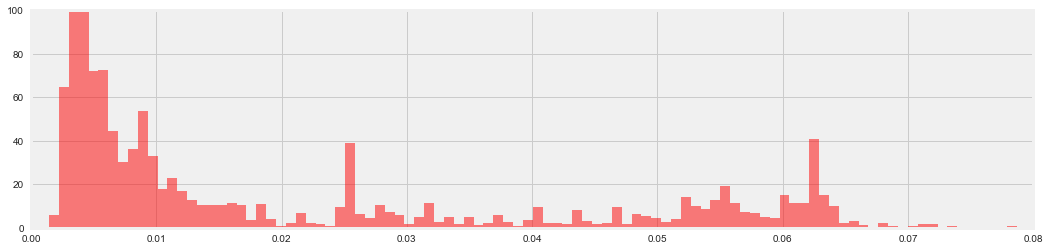

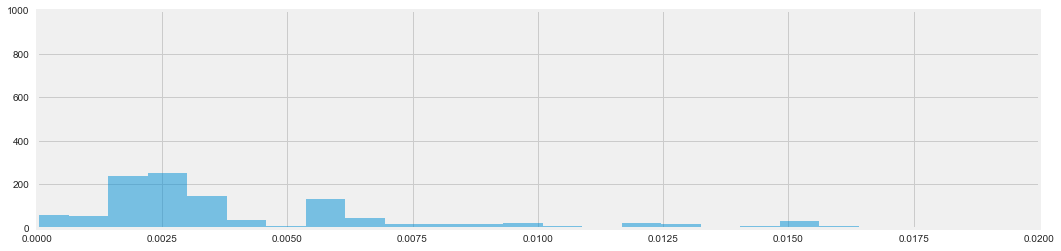

In [88]:
hist_it2(train['return'])
plt.ylim((0,100))
plt.xlim((0,.08))

hist_it3(train['return'])
plt.ylim((0,1000))
plt.xlim((0,.02))

In [89]:
train[train['desk_id_null']==1].describe()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date,return,desk_id_null
count,3.665000e+03,3.665000e+03,3665.000000,3665.000000,3.665000e+03,3.665000e+03,3.665000e+03,3665.000000,3665.0
mean,2.014789e+07,6.232608e+07,-0.000495,0.183027,6.231198e+07,2.014788e+07,2.014877e+07,0.003701,1.0
std,1.502858e+04,2.250163e+08,0.001940,0.651602,2.250133e+08,1.503137e+04,1.504448e+04,0.004241,0.0
min,2.012092e+07,1.100000e+04,-0.003740,-0.667095,1.098759e+04,2.012092e+07,2.012092e+07,-0.009600,1.0
25%,2.013123e+07,2.129600e+07,-0.001720,-0.485486,2.129288e+07,2.013123e+07,2.014021e+07,0.001560,1.0
50%,2.015051e+07,4.290000e+07,-0.000420,0.200114,4.289834e+07,2.015051e+07,2.015061e+07,0.002760,1.0
75%,2.016072e+07,7.701100e+07,0.001160,0.586674,7.706105e+07,2.016072e+07,2.016082e+07,0.005400,1.0
max,2.017103e+07,1.320000e+10,0.002580,1.820857,1.320000e+10,2.017103e+07,2.017103e+07,0.028320,1.0


In [90]:
train[train['desk_id_null']==0].describe()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date,return,desk_id_null
count,5.701000e+03,5.699000e+03,5701.000000,5227.000000,5.699000e+03,5.701000e+03,5.701000e+03,5701.000000,5701.0
mean,2.009724e+07,1.274715e+08,0.015732,1.569545,1.273447e+08,2.009724e+07,2.009772e+07,0.020785,0.0
std,1.954483e+04,1.639074e+08,0.013604,1.589419,1.638129e+08,1.953819e+04,1.933997e+04,0.023833,0.0
min,2.004041e+07,1.100000e+00,0.001220,0.292030,1.099698e+00,2.004072e+07,2.004071e+07,0.000000,0.0
25%,2.009011e+07,3.850000e+07,0.005260,0.477822,3.832942e+07,2.009011e+07,2.009013e+07,0.004440,0.0
50%,2.010080e+07,7.566900e+07,0.012050,0.822006,7.560667e+07,2.010080e+07,2.010083e+07,0.009000,0.0
75%,2.011093e+07,1.460470e+08,0.020930,2.273930,1.459707e+08,2.011093e+07,2.011101e+07,0.032689,0.0
max,2.012092e+07,1.773078e+09,0.050880,6.379137,1.772926e+09,2.012092e+07,2.012122e+07,0.778441,0.0


In [91]:
test.describe()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date,desk_id_null
count,4.801000e+03,4.801000e+03,4801.000000,4536.000000,4.801000e+03,4.801000e+03,4.801000e+03,4801.000000
mean,2.011849e+07,1.024942e+08,0.008717,0.930464,1.024165e+08,2.011849e+07,2.011911e+07,0.405749
std,2.992170e+04,1.356065e+08,0.012747,1.387474,1.355206e+08,2.991692e+04,3.005556e+04,0.491088
min,2.004061e+07,1.100000e+00,-0.003740,-0.667095,1.099989e+00,2.004072e+07,2.004071e+07,0.000000
25%,2.010052e+07,2.891900e+07,0.000970,0.240305,2.891866e+07,2.010053e+07,2.010061e+07,0.000000
50%,2.012010e+07,5.725500e+07,0.004250,0.531493,5.725304e+07,2.012010e+07,2.012011e+07,0.000000
75%,2.014083e+07,1.210000e+08,0.013320,1.065318,1.209652e+08,2.014083e+07,2.014100e+07,1.000000
max,2.017103e+07,1.560212e+09,0.050880,6.434407,1.560168e+09,2.017103e+07,2.017103e+07,1.000000


In [92]:
train.dtypes

portfolio_id       object
desk_id            object
office_id          object
pf_category        object
start_date          int64
sold              float64
country_code       object
euribor_rate      float64
currency           object
libor_rate        float64
bought            float64
creation_date       int64
indicator_code     object
sell_date           int64
type               object
hedge_value        object
status             object
return            float64
desk_id_null        int64
dtype: object

In [93]:
train = train.sort_values('start_date',ascending=False)

In [94]:
train.desk_id_null.value_counts()

0    5701
1    3665
Name: desk_id_null, dtype: int64

In [95]:
l =[]
for i in range(3665):
    l.append(-1)

In [96]:
trainc = train[train['desk_id_null']==0]

In [97]:
encoding = trainc.groupby('desk_id').size()

In [98]:
trainc['enc'] = trainc.desk_id.map(encoding)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
for i in trainc.enc:
    l.append(i)

In [100]:
from collections import Counter

In [101]:
Counter(l)

Counter({-1: 3665,
         1: 3110,
         2: 928,
         3: 717,
         4: 296,
         5: 155,
         6: 258,
         7: 140,
         8: 32,
         9: 45,
         10: 20})

In [102]:
train['team'] = l

In [103]:
test = test.sort_values('start_date',ascending=False)

In [104]:
test.desk_id_null.value_counts()

0    2853
1    1948
Name: desk_id_null, dtype: int64

In [105]:
l =[]
for i in range(1948):
    l.append(-1)

In [106]:
testc= test[test['desk_id_null']==0]

In [107]:
encoding = testc.groupby('desk_id').size()

In [108]:
testc['enc'] = testc.desk_id.map(encoding)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
for i in testc.enc:
    l.append(i)

In [110]:
test['team'] = l

In [111]:
train.shape , test.shape

((9366, 20), (4801, 19))

In [112]:
cat_cols = list(train.select_dtypes(include=['object']).columns)
num_cols = list(train.select_dtypes(exclude=['object']).columns)

In [113]:
cat_cols

['portfolio_id',
 'desk_id',
 'office_id',
 'pf_category',
 'country_code',
 'currency',
 'indicator_code',
 'type',
 'hedge_value',
 'status']

In [114]:
dic = dict(zip(train.office_id.unique(),[1,2]))

In [115]:
train['office_id'] = train['office_id'].map(dic)

In [116]:
test['office_id'] = test['office_id'].map(dic)

In [117]:
dic = dict(zip(train.pf_category.unique(),[1,2,3,4,5]))

In [118]:
train['pf_category'] = train['pf_category'].map(dic)

In [119]:
test['pf_category'] = test['pf_category'].map(dic)

In [120]:
dic = dict(zip(train.country_code.unique(),[1,2,3,4,5]))

In [121]:
train['country_code'] = train['country_code'].map(dic)

In [122]:
test['country_code'] = test['country_code'].map(dic)

In [123]:
dic = dict(zip(train.currency.unique(),[1,2,3,4,5]))

In [124]:
train['currency'] = train['currency'].map(dic)

In [125]:
test['currency'] = test['currency'].map(dic)

In [126]:
dic = dict(zip(train.type.unique(),[1,2,3,4,5,6,7,8]))

In [127]:
train['type'] = train['type'].map(dic)

In [128]:
test['type'] = test['type'].map(dic)

In [129]:
num_cols

['start_date',
 'sold',
 'euribor_rate',
 'libor_rate',
 'bought',
 'creation_date',
 'sell_date',
 'return',
 'desk_id_null',
 'team']

In [130]:
train.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,desk_id_null,team
7656,PF00015641,NaN,1,1,20171026,4.677352e+08,1,-0.00103,1,1.820857,4.677350e+08,20171026,True,20171031,1,False,True,0.000038,1,-1
7655,PF00015640,NaN,1,1,20171026,3.593009e+04,1,-0.00103,1,1.820857,3.593007e+04,20171026,True,20171031,1,False,True,0.000038,1,-1
7475,PF00015638,NaN,2,2,20171026,3.230588e+05,2,-0.00103,2,-0.515291,2.925764e+06,20171026,True,20171031,2,False,True,0.000038,1,-1
8788,PF00015636,NaN,2,2,20170926,1.100000e+05,2,-0.00114,2,-0.507438,1.099908e+05,20170926,True,20170929,2,False,True,0.012000,1,-1
7678,PF00015629,NaN,1,1,20170907,8.336350e+04,1,-0.00114,1,1.738247,8.335424e+04,20170907,True,20170927,1,False,True,0.000024,1,-1


In [131]:
train.libor_rate.fillna(-9,inplace=True)

In [132]:
test.libor_rate.fillna(-9,inplace=True)

In [133]:
l =[]
for i in train.libor_rate:
    if i == -9:
        l.append(5)
    else:
        l.append(0)
        
train['libor_rate_null'] = l

In [134]:
l =[]
for i in test.libor_rate:
    if i == -9:
        l.append(5)
    else:
        l.append(0)
        
test['libor_rate_null'] = l

In [144]:
train.indicator_code = train['indicator_code'].map({'False':0,True:1})

In [145]:
test.indicator_code = train['indicator_code'].map({'False':0,True:1})

In [146]:
train.hedge_value.value_counts(dropna=False)

NaN      5701
False    2437
True     1228
Name: hedge_value, dtype: int64

In [148]:
train.hedge_value.fillna('NaN',inplace=True)
test.hedge_value.fillna('NaN',inplace=True)

In [151]:
train['hedge_value'].map({False:0,True:1,'NaN':-1})

7656    0
7655    0
7475    0
8788    0
7678    0
8226    0
7695    0
8513    0
8890    0
8224    0
8889    0
8225    0
7383    0
7384    0
8223    0
7732    0
7382    0
8692    0
7381    0
8693    0
8677    0
8676    0
8222    0
8675    0
8670    0
7353    0
7352    0
8284    0
8671    0
7689    0
       ..
26     -1
24     -1
25     -1
23     -1
22     -1
21     -1
51     -1
39     -1
19     -1
20     -1
17     -1
63     -1
15     -1
16     -1
13     -1
11     -1
12     -1
2      -1
0      -1
18     -1
1      -1
5      -1
7      -1
6      -1
10     -1
4      -1
3      -1
14     -1
8      -1
9      -1
Name: hedge_value, Length: 9366, dtype: int64

In [152]:
train.hedge_value = train['hedge_value'].map({False:0,True:1,'NaN':-1})

In [153]:
test.hedge_value = test['hedge_value'].map({False:0,True:1,'NaN':-1})

In [154]:
train.hedge_value

7656    0
7655    0
7475    0
8788    0
7678    0
8226    0
7695    0
8513    0
8890    0
8224    0
8889    0
8225    0
7383    0
7384    0
8223    0
7732    0
7382    0
8692    0
7381    0
8693    0
8677    0
8676    0
8222    0
8675    0
8670    0
7353    0
7352    0
8284    0
8671    0
7689    0
       ..
26     -1
24     -1
25     -1
23     -1
22     -1
21     -1
51     -1
39     -1
19     -1
20     -1
17     -1
63     -1
15     -1
16     -1
13     -1
11     -1
12     -1
2      -1
0      -1
18     -1
1      -1
5      -1
7      -1
6      -1
10     -1
4      -1
3      -1
14     -1
8      -1
9      -1
Name: hedge_value, Length: 9366, dtype: int64

In [155]:
train['status'].unique()

array([True, 'False'], dtype=object)

In [156]:
train.status = train['status'].map({'False':0,True:1})

In [157]:
test.status = test['status'].map({'False':0,True:1})

In [161]:
train['start_year'] = train['start_date'] // 10000

In [163]:
train['start_day'] = train['start_date'] % 100

In [166]:
train['start_month'] = (train['start_date'] %10000) //100

In [167]:
test['start_year'] = test['start_date'] // 10000
test['start_day'] = test['start_date'] % 100
test['start_month'] = (test['start_date'] %10000) //100

In [169]:
train['creation_day'] = train['creation_date'] %100 

In [171]:
test['creation_day'] = test['creation_date'] %100 

In [172]:
train['diff'] = train['creation_day'] - train['start_day']

In [173]:
test['diff'] = test['creation_day'] - test['start_day']

In [174]:
test['sell_year'] = test['sell_date'] // 10000
test['sell_day'] = test['sell_date'] % 100
test['sell_month'] = (test['sell_date'] %10000) //100

In [175]:
train['sell_year'] = train['sell_date'] // 10000
train['sell_day'] = train['sell_date'] % 100
train['sell_month'] = (train['sell_date'] %10000) //100

In [176]:
train['diff_year'] = train['sell_year']- train['start_year'] 

In [181]:
train.diff_month.value_counts()

0     4201
1     3522
3      618
2      403
11     300
9      218
10      64
4       18
8       14
6        6
7        1
5        1
Name: diff_month, dtype: int64

In [180]:
train['diff_month'] = abs(train['sell_month'] - train['start_month'])

In [182]:
train['diff_day'] = train['sell_day'] - train['start_day']

In [183]:
test['diff_year'] = test['sell_year']- test['start_year'] 
test['diff_month'] = abs(test['sell_month'] - test['start_month'])
test['diff_day'] = test['sell_day'] - test['start_day']

In [184]:
train.shape , test.shape

((9366, 32), (4801, 31))

In [185]:
train.to_csv('train_mod.csv',index=False
            )

In [187]:
test.to_csv('test_mod.csv',index=False)